#Trabalho Equações Diferenciais Ordinárias
###Grupo: Vitor Zimbrunes Pamplona
###Matrícula: 20190038570

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Método de Euler e Método Runge-Kutta Quarta Ordem para equação diferencial de primeira Ordem

In [ ]:
def euler_method(f, x0, y0, h, num_steps):
  x = np.zeros(num_steps + 1)
  y = np.zeros(num_steps + 1)
  x[0] = x0
  y[0] = y0

  for i in range(num_steps):
    y[i + 1] = y[i] + h * f(x[i], y[i])
    x[i + 1] = x[i] + h

  return x, y

def runge_kutta_method(f, x0, y0, h, num_steps):
  x = np.zeros(num_steps + 1)
  y = np.zeros(num_steps + 1)
  x[0] = x0
  y[0] = y0

  for i in range(num_steps):
    k1 = h * f(x[i], y[i])
    k2 = h * f(x[i] + h/2, y[i] + k1/2)
    k3 = h * f(x[i] + h/2, y[i] + k2/2)
    k4 = h * f(x[i] + h, y[i] + k3)

    y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    x[i + 1] = x[i] + h

  return x, y

# Função f(x, y) que define a equação diferencial dy/dx = f(x, y)
def f(x, y):
  return x * y

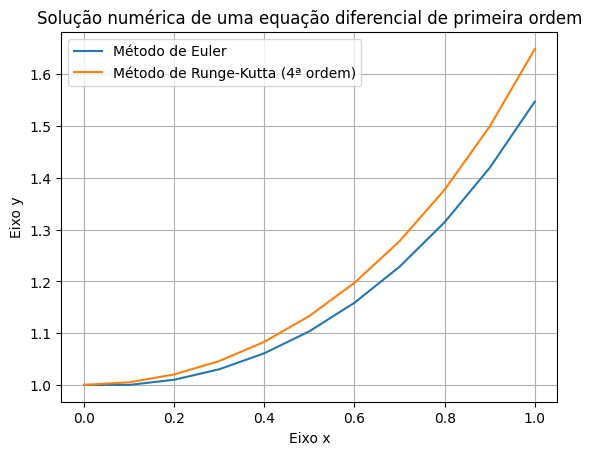

In [ ]:
# Condições iniciais
x0 = 0.0
y0 = 1.0

# Passo de integração e número de passos
h = 0.1
num_steps = 10

# Método de Euler
x_euler, y_euler = euler_method(f, x0, y0, h, num_steps)

# Método de Runge-Kutta de quarta ordem
x_rk4, y_rk4 = runge_kutta_method(f, x0, y0, h, num_steps)

# Plotando os resultados
plt.plot(x_euler, y_euler, label='Método de Euler')
plt.plot(x_rk4, y_rk4, label='Método de Runge-Kutta (4ª ordem)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.grid(True)
plt.title('Solução numérica de uma equação diferencial de primeira ordem')
plt.legend()
plt.show()

#Método de Euler e Método Runge-Kutta Quarta Ordem para um sistema de duas equações diferenciais de primeira ordem

In [ ]:
def euler_method_system(f, x0, y0, h, num_steps):
  n = len(y0)
  x = np.zeros(num_steps + 1)
  y = np.zeros((num_steps + 1, n))
  x[0] = x0
  y[0] = y0

  for i in range(num_steps):
    y[i + 1] = y[i] + h * f(x[i], y[i])
    x[i + 1] = x[i] + h

  return x, y

def runge_kutta_method_system(f, x0, y0, h, num_steps):
  n = len(y0)
  x = np.zeros(num_steps + 1)
  y = np.zeros((num_steps + 1, n))
  x[0] = x0
  y[0] = y0

  for i in range(num_steps):
    k1 = h * f(x[i], y[i])
    k2 = h * f(x[i] + h/2, y[i] + k1/2)
    k3 = h * f(x[i] + h/2, y[i] + k2/2)
    k4 = h * f(x[i] + h, y[i] + k3)

    y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    x[i + 1] = x[i] + h

  return x, y

# Função f(x, y) que define o sistema de equações diferenciais dy/dx = f(x, y)
def f(x, y):
  n = len(y)
  result = np.zeros(n)
  result[0] = y[1]
  result[1] = -y[0]
  return result

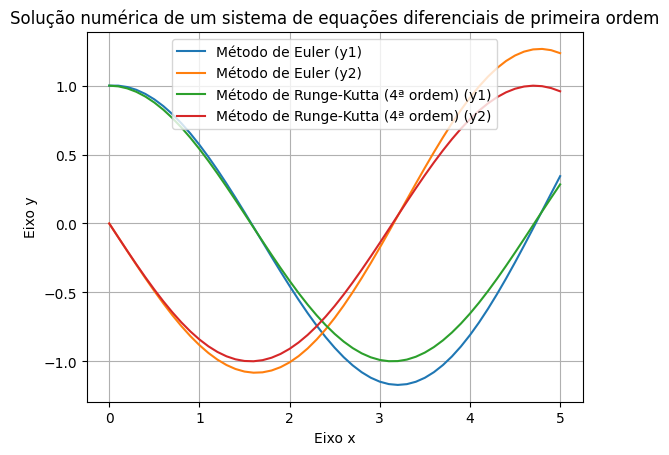

In [ ]:
# Condições iniciais
x0 = 0.0
y0 = np.array([1.0, 0.0])

# Passo de integração e número de passos
h = 0.1
num_steps = 50

# Método de Euler
x_euler, y_euler = euler_method_system(f, x0, y0, h, num_steps)

# Método de Runge-Kutta de quarta ordem
x_rk4, y_rk4 = runge_kutta_method_system(f, x0, y0, h, num_steps)

# Plotando os resultados
plt.plot(x_euler, y_euler[:, 0], label='Método de Euler (y1)')
plt.plot(x_euler, y_euler[:, 1], label='Método de Euler (y2)')
plt.plot(x_rk4, y_rk4[:, 0], label='Método de Runge-Kutta (4ª ordem) (y1)')
plt.plot(x_rk4, y_rk4[:, 1], label='Método de Runge-Kutta (4ª ordem) (y2)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.grid(True)
plt.title('Solução numérica de um sistema de equações diferenciais de primeira ordem')
plt.legend()
plt.show()

#Método de diferenças finitas para PVC de segunda ordem

In [ ]:
def solve_pvc_diferencas_finitas(a, b, alpha, beta, f, N):
  h = (b - a) / (N + 1)  # Passo de discretização

  x = np.linspace(a, b, N + 2)  # Pontos de discretização
  y = np.zeros(N + 2)  # Vetor de solução
  y[0] = alpha
  y[N + 1] = beta

  A = np.zeros((N, N))  # Matriz de coeficientes
  b = np.zeros(N)  # Vetor do lado direito

  for i in range(N):
    xi = x[i + 1]
    b[i] = h ** 2 * f(xi, y[i + 1])

    A[i, i] = -2
    if i > 0:
      A[i, i - 1] = 1
    if i < N - 1:
      A[i, i + 1] = 1

  # Algoritmo de Thomas para resolver o sistema tridiagonal
  c = np.zeros(N)
  d = np.zeros(N)
  c[0] = A[0, 1] / A[0, 0]
  d[0] = b[0] / A[0, 0]

  for i in range(1, N):
    if i < N - 1:
      c[i] = A[i, i + 1] / (A[i, i] - A[i, i - 1] * c[i - 1])
    d[i] = (b[i] - A[i, i - 1] * d[i - 1]) / (A[i, i] - A[i, i - 1] * c[i - 1])

  y[N] = d[N - 1]
  for i in range(N - 2, -1, -1):
    y[i + 1] = d[i] - c[i] * y[i + 2]

  return x, y

# Função f(x, y) que define a equação diferencial d^2y/dx^2 = f(x, y)
def f(x, y):
  return -2 * x * y

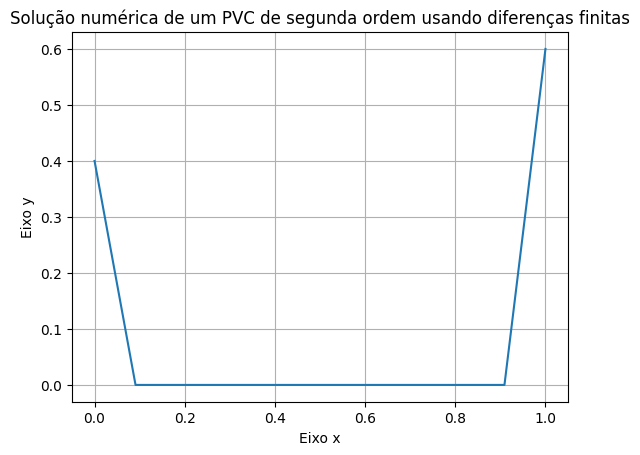

In [ ]:
# Intervalo de integração
a = 0.0
b = 1.0

# Condições de contorno
alpha = 0.4
beta = 0.6

# Número de pontos de discretização
N = 10

# Resolvendo o PVC usando diferenças finitas e o Algoritmo de Thomas
x, y = solve_pvc_diferencas_finitas(a, b, alpha, beta, f, N)

# Plotando a solução
plt.plot(x, y)
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.grid(True)
plt.title('Solução numérica de um PVC de segunda ordem usando diferenças finitas')
plt.show()